In [1]:
!pip3 install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

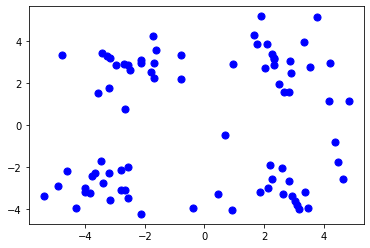

In [3]:
x = []

# Dataset from https://www.kaggle.com/hjw99868/kmeans-clustering-data
with open('data.txt', 'r') as file:
    data = file.read()
    lines = data.split("\n")
    for line in lines:
        split = line.split("	")
        x.append([float(split[0].rstrip()), float(split[1].rstrip())])
        
x = np.asarray(x)
    
plt.scatter(x[:,0], x[:,1], s=50, color='b')
plt.show()

In [4]:
class KMeans():
  def __init__(self, n_clusters, data):
    self.k = n_clusters
    self.x = data
  
    self.centroids = np.random.uniform(low=-4, high=4, size=(self.k,2))

    self.labels = self.genLabels()
    
    self.colors = {0:'red', 1:'blue', 2:'green', 3:'black'}

  def dist(self, p, q):
    return math.sqrt(math.pow((p[0]-q[0]),2) + math.pow((p[1]-q[1]),2))
  
  def classify(self, p):
    return np.argmin([self.dist(p, centroid) for centroid in self.centroids])
    
  def genLabels(self):
    return [self.classify(p) for p in self.x]

  def fit(self, epochs, step):
    print(f"\nFitting for {epochs} epochs with step of {step}")
    for epoch in range(0, epochs):
      for i, centroid in enumerate(self.centroids):
        avgX, avgY = 0, 0
        c = self.labels.count(i)

        for j, p in enumerate(x):
          if self.labels[j] == i:
            avgX += p[0] - centroid[0]
            avgY += p[1] - centroid[1]

        self.centroids[i][0] += (avgX/c)*step
        self.centroids[i][1] += (avgY/c)*step
      
      self.labels = self.genLabels()   
    
    print("Done fitting!\n")

  def showPlot(self, classification=False):
    plt.figure(1, figsize = (10,10))
    
    if classification:
      for i, p in enumerate(self.x):
       plt.scatter(p[0], p[1], color=self.colors[self.labels[i]])
      
      for i, centroid in enumerate(self.centroids):
        plt.scatter(centroid[0], centroid[1], color=self.colors[i], s=100, marker="x")

    else:
      plt.scatter(self.x[:,0], self.x[:,1], color='blue')

      plt.scatter(self.centroids[:,0], self.centroids[:,1], color="red", s=100)

    plt.show()
    

  
  def printCentroids(self):
    print("="*20)
    print("Centroids:")
    print(self.centroids)


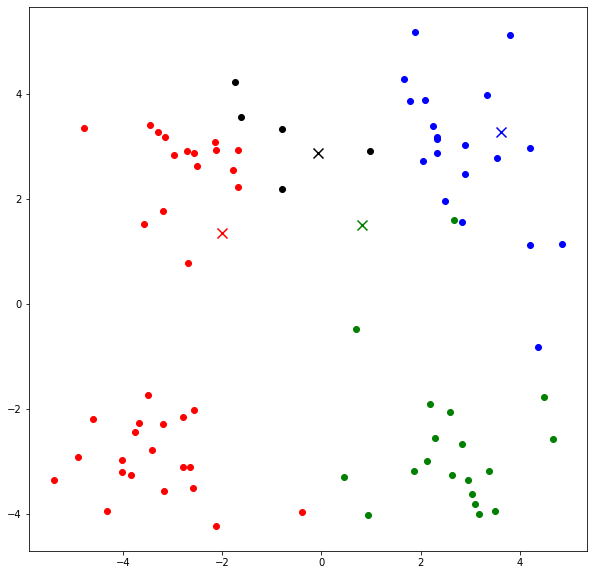

Centroids:
[[-1.99895869  1.35565729]
 [ 3.61434138  3.27477083]
 [ 0.82097167  1.50170338]
 [-0.06802179  2.8737008 ]]

Fitting for 100 epochs with step of 0.1
Done fitting!

Centroids:
[[-3.53968992 -2.89364873]
 [ 2.73187343  3.01549027]
 [ 2.54135999 -2.87200466]
 [-2.46143955  2.78740061]]


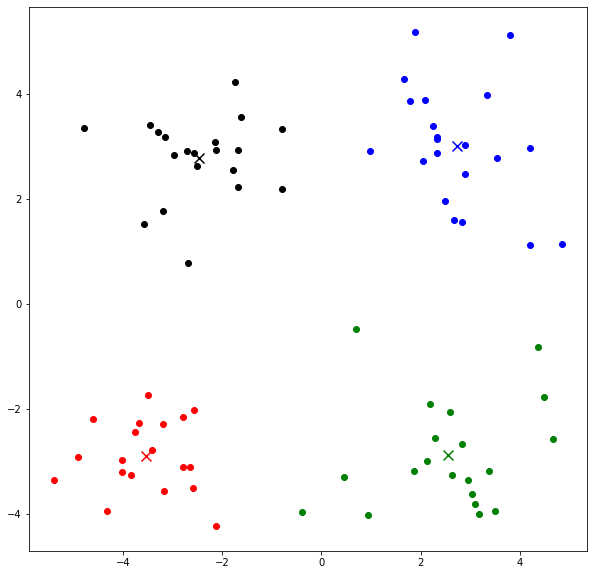

In [5]:
kmeans = KMeans(n_clusters=4, data=x)
kmeans.showPlot(classification=True)
kmeans.printCentroids()
kmeans.fit(100, 0.1)
kmeans.printCentroids()
kmeans.showPlot(classification=True)